# Common Statistical Metods 

## T Test

In [1]:
# Import the module
from scipy import stats

In [2]:
# Raw soyabean yield data
sb_riley = [65, 60, 65, 58, 65]
sb_republic = [86, 77, 90, 50, 81]

# Run t-test
# Null hypothesis is that 2 independent samples have identitical average
stats.ttest_ind(sb_riley, sb_republic)

Ttest_indResult(statistic=-1.9691856965995629, pvalue=0.08444995096668001)

## ANOVA 

- Assumptions: 
1. Data normally distributed (Shapiro-Wilk)
2. Equality of variance (Bartlett Test, Levene Test)
3. Independent

In [3]:
# Import Modules 
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

In [4]:
filename = "https://raw.githubusercontent.com/soilwater/pynotes-agriscience/gh-pages/datasets/corn_nue_multiple_locs.csv"
df = pd.read_csv(filename)
df.head()

,Year,State,Site,Textural_class,Replications,Treatments,N_Planting_kg_ha,N_Sidedress_kg_ha,N_Total_kg_ha,Yield_T_ha
0,2006,Illinois,Pad,Silt loam,1,1,0,0,0,3.26
1,2006,Illinois,Pad,Silt loam,1,3,36,0,36,4.15
2,2006,Illinois,Pad,Silt loam,1,5,36,54,90,8.64
3,2006,Illinois,Pad,Silt loam,1,7,36,107,143,10.52
4,2006,Illinois,Pad,Silt loam,1,9,36,161,197,11.47


In [5]:
# Inspect Data 
print(df["Year"].unique())
print(df["State"].unique())
print(df["Treatments"].unique())
df.shape

[2006 2007 2008]
['Illinois' 'Kansas' 'Missouri']
[1 3 5 7 9]


(120, 10)

<AxesSubplot:title={'center':'Yield_T_ha'}, xlabel='N_Total_kg_ha'>

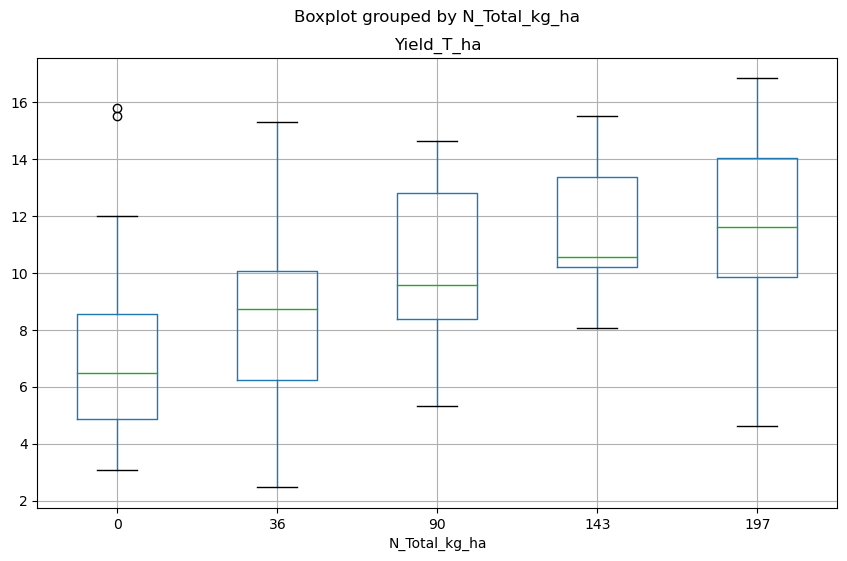

In [6]:
# Inspect data using boxplots 
df.boxplot(column='Yield_T_ha', by = 'N_Total_kg_ha', figsize=(10, 6))

<AxesSubplot:title={'center':'Yield_T_ha'}, xlabel='[Site, Year]'>

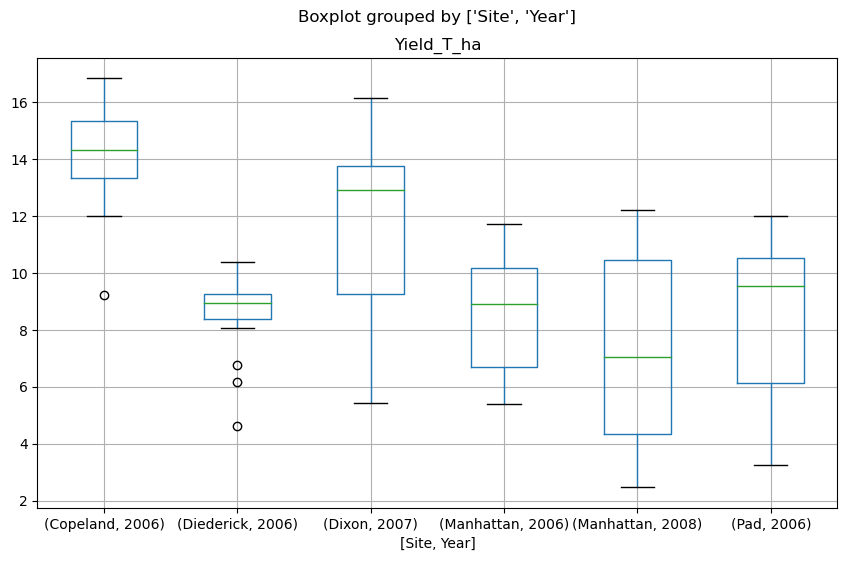

In [7]:
df.boxplot(column='Yield_T_ha', by =['Site', 'Year'], figsize=(10, 6))

In [8]:
# Test Assumption of Normality

# Null Hypothesis: Data was obtained from a normal distribution 
stats.shapiro(df['Yield_T_ha'])

ShapiroResult(statistic=0.9829135537147522, pvalue=0.1326330304145813)

In [9]:
#Test for homogeneity of variance 

# Null hypothesis: All the groups have equal variance 

D = {}

for tmt in df['Treatments'].unique():
    idx_tmt = df['Treatments'] == tmt
    D[tmt] = df.loc[idx_tmt, 'Yield_T_ha'].values

stats.bartlett(D[1], D[3], D[5], D[7], D[9])


BartlettResult(statistic=6.054092711026625, pvalue=0.19514485256182393)

In [10]:
stats.f_oneway(D[1], D[3], D[5], D[7], D[9])

F_onewayResult(statistic=11.431258827879908, pvalue=7.582810948341893e-08)

In [11]:
print(stats.tukey_hsd(D[1], D[3], D[5], D[7], D[9]))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.317     0.519    -3.642     1.007
 (0 - 2)     -3.036     0.004    -5.361    -0.711
 (0 - 3)     -4.310     0.000    -6.634    -1.985
 (0 - 4)     -4.745     0.000    -7.070    -2.421
 (1 - 0)      1.317     0.519    -1.007     3.642
 (1 - 2)     -1.718     0.250    -4.043     0.607
 (1 - 3)     -2.992     0.005    -5.317    -0.667
 (1 - 4)     -3.428     0.001    -5.753    -1.103
 (2 - 0)      3.036     0.004     0.711     5.361
 (2 - 1)      1.718     0.250    -0.607     4.043
 (2 - 3)     -1.274     0.553    -3.599     1.051
 (2 - 4)     -1.710     0.255    -4.034     0.615
 (3 - 0)      4.310     0.000     1.985     6.634
 (3 - 1)      2.992     0.005     0.667     5.317
 (3 - 2)      1.274     0.553    -1.051     3.599
 (3 - 4)     -0.436     0.985    -2.761     1.889
 (4 - 0)      4.745     0.000     2.421     7.070
 (4 - 1)      3.428     0.001   

In [12]:
# One-Way ANOVA Test

formula = 'Yield_T_ha ~ C(N_Total_kg_ha)'
lm = ols(formula, data = df).fit()
output = anova_lm(lm)
output

,df,sum_sq,mean_sq,F,PR(>F)
C(N_Total_kg_ha),4.0,386.085542,96.521385,11.431259,7.582811e-08
Residual,115.0,971.018108,8.443636,NaN,NaN


In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Yield_T_ha   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     11.43
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           7.58e-08
Time:                        14:29:06   Log-Likelihood:                -295.72
No. Observations:                 120   AIC:                             601.4
Df Residuals:                     115   BIC:                             615.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.0758      0.593     11.929      0.000       5.901       8.251
C(N_Total_kg_ha)[T.36]      1.3175      0.839      1.571      0.119      -0.344       2.979
C(N_Total_kg_ha)[T.90]      3.0358      0.839      3.619      0.000       1.374       4.697
C(N_Total_kg_ha)[T.143]     4.3096      0.839      5.138      0.000       2.648       5.971
C(N_Total_kg_ha)[T.197]     4.7454      0.839      5.657      0.000       3.084       6.407
==============================================================================
Omnibus:                        5.761   Durbin-Watson:                   0.602
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.231
Skew:                           0.483   Prob(JB):                       0.0731
Kurtosis:                       3.339   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Multicomparision Test 

groups = MultiComparison(df['Yield_T_ha'], df['N_Total_kg_ha']).tukeyhsd(alpha = 0.05)
print(groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     36   1.3175 0.5192 -1.0073 3.6423  False
     0     90   3.0358  0.004   0.711 5.3607   True
     0    143   4.3096    0.0  1.9847 6.6344   True
     0    197   4.7454    0.0  2.4206 7.0703   True
    36     90   1.7183 0.2499 -0.6065 4.0432  False
    36    143   2.9921 0.0047  0.6672 5.3169   True
    36    197   3.4279 0.0008  1.1031 5.7528   True
    90    143   1.2738 0.5527 -1.0511 3.5986  False
    90    197   1.7096 0.2547 -0.6153 4.0344  False
   143    197   0.4358 0.9852  -1.889 2.7607  False
---------------------------------------------------


Text(0, 0.5, 'Nitrogen rate (kg/ha)')

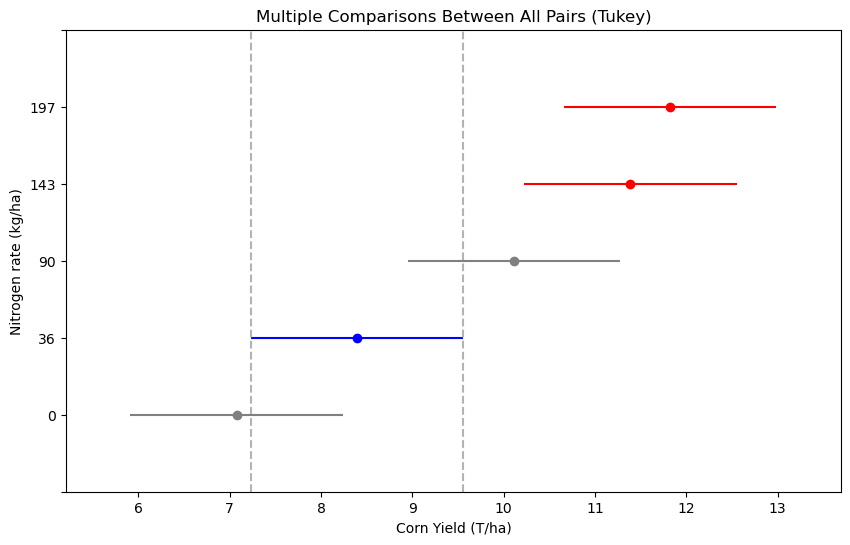

In [15]:
groups.plot_simultaneous(comparison_name = 36)
plt.xlabel('Corn Yield (T/ha)')
plt.ylabel("Nitrogen rate (kg/ha)")

In [16]:
# Two way ANOVA 

formula = 'Yield_T_ha ~ C(N_Total_kg_ha) + Textural_class'
anova_lm(ols(formula, data =df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(N_Total_kg_ha),4.0,386.085542,96.521385,11.750059,5.022955e-08
Textural_class,1.0,34.560000,34.560000,4.207172,4.254546e-02
Residual,114.0,936.458108,8.214545,NaN,NaN


In [17]:
formula = 'Yield_T_ha ~ C(N_Total_kg_ha) * State * C(Year)'
anova_lm(ols(formula, data =df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(N_Total_kg_ha),4.0,386.085542,96.521385,20.522835,3.270251e-12
State,2.0,234.432785,117.216393,24.923106,1.989675e-09
C(Year),2.0,112.504702,56.252351,11.960642,2.328310e-05
C(N_Total_kg_ha):State,8.0,140.688973,17.586122,3.739245,7.649526e-04
C(N_Total_kg_ha):C(Year),8.0,36.595110,4.574389,0.972628,4.621589e-01
State:C(Year),4.0,3.702360,0.925590,0.196803,9.394942e-01
C(N_Total_kg_ha):State:C(Year),16.0,15.853049,0.990816,0.210672,9.994849e-01
Residual,95.0,446.796537,4.703121,NaN,NaN


## Linear Regression 

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [19]:
# Generate lambda function 
lm = lambda x, intercept, slope: intercept + slope * x

In [20]:
filename = "https://raw.githubusercontent.com/soilwater/pynotes-agriscience/gh-pages/datasets/anscombe_quartet.csv"
df = pd.read_csv(filename)
df.head()

,obs,x1,y1,x2,y2,x3,y3,x4,y4
0,1,10,8.04,10,9.14,10,7.46,8,6.58
1,2,8,6.95,8,8.14,8,6.77,8,5.76
2,3,13,7.58,13,8.74,13,12.74,8,7.71
3,4,9,8.81,9,8.77,9,7.11,8,8.84
4,5,11,8.33,11,9.26,11,7.81,8,8.47


In [21]:
# Fit the linear model 
slope, intercept, r_val, p_val, std_err = stats.linregress(df['x1'], df['y1'])

In [22]:
# Create vector of x values for plotting 
x = np.array([df['x1'].min(), df['x1'].max()])

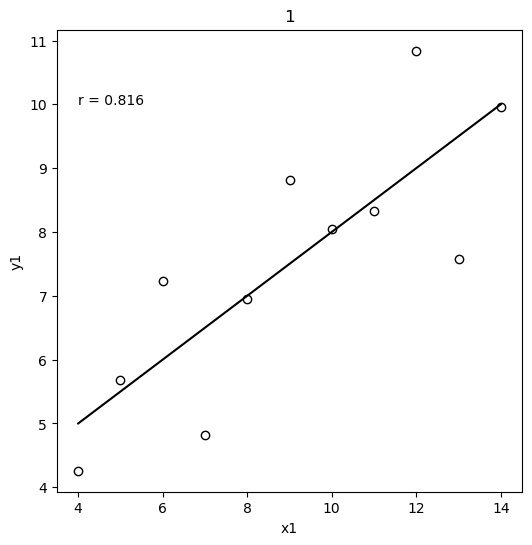

In [23]:

plt.figure(figsize = (6, 6))
plt.title('1')
plt.scatter(df['x1'], df['y1'], facecolor = 'w', edgecolor = 'k')
plt.plot(x, lm(x, intercept, slope), color = 'k')
plt.xlabel('x1')
plt.ylabel('y1')
plt.text(4, 10, f'r = {round(r_val, 3)}')
#plt.text(4, 10, 'r = 'str(round(r_val, 3))

plt.show()

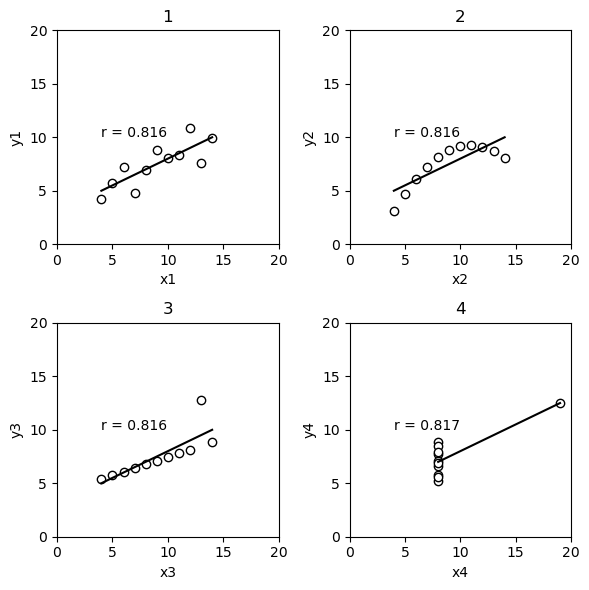

In [24]:
# Using for loop to create subplots with regression 

# Define range for subplots 

plt.figure(figsize = (6, 6))

for p in range(1, 5):

    # Fit the linear model 
    slope, intercept, r_val, p_val, std_err = stats.linregress(df[f'x{p}'], df[f'y{p}'])
    
    # Create vector of x values for plotting 
    
    plt.subplot(2, 2, p)
    x = np.array([df[f'x{p}'].min(), df[f'x{p}'].max()]) 
    #x = np.array(df[['x1', "x2", "x3", "x4"]].min(), df[['x1', "x2", "x3", "x4"]].max())
    plt.title(p)
    plt.scatter(df[f'x{p}'], df[f'y{p}'], facecolor = 'w', edgecolor = 'k')
    plt.plot(x, lm(x, intercept, slope), color = 'k')
    plt.xlabel(f'x{p}')
    plt.ylabel(f'y{p}')
    plt.xlim(0,20)
    plt.ylim(0,20)
    plt.text(4, 10, f'r = {round(r_val, 3)}')
    plt.tight_layout()

## Linear Regression Using Numpy

In [25]:
# Fit the model
par = np.polyfit(df['x1'], df['y1'], 1) # 1 indicates linear fit in th polyfit 
par # First value is the slope and second value is intercept 

array([0.50009091, 3.00009091])

In [26]:
# Generate some X values 
#X = np.array([4, 20]) # new data 
X = np.linspace(4, 20, 120)

In [27]:
# Evaluate the model with some x data 
y_pred = np.polyval(par, X)
y_pred

array([ 5.00045455,  5.06769366,  5.13493277,  5.20217189,  5.269411  ,
        5.33665011,  5.40388923,  5.47112834,  5.53836746,  5.60560657,
        5.67284568,  5.7400848 ,  5.80732391,  5.87456303,  5.94180214,
        6.00904125,  6.07628037,  6.14351948,  6.21075859,  6.27799771,
        6.34523682,  6.41247594,  6.47971505,  6.54695416,  6.61419328,
        6.68143239,  6.7486715 ,  6.81591062,  6.88314973,  6.95038885,
        7.01762796,  7.08486707,  7.15210619,  7.2193453 ,  7.28658442,
        7.35382353,  7.42106264,  7.48830176,  7.55554087,  7.62277998,
        7.6900191 ,  7.75725821,  7.82449733,  7.89173644,  7.95897555,
        8.02621467,  8.09345378,  8.1606929 ,  8.22793201,  8.29517112,
        8.36241024,  8.42964935,  8.49688846,  8.56412758,  8.63136669,
        8.69860581,  8.76584492,  8.83308403,  8.90032315,  8.96756226,
        9.03480138,  9.10204049,  9.1692796 ,  9.23651872,  9.30375783,
        9.37099694,  9.43823606,  9.50547517,  9.57271429,  9.63

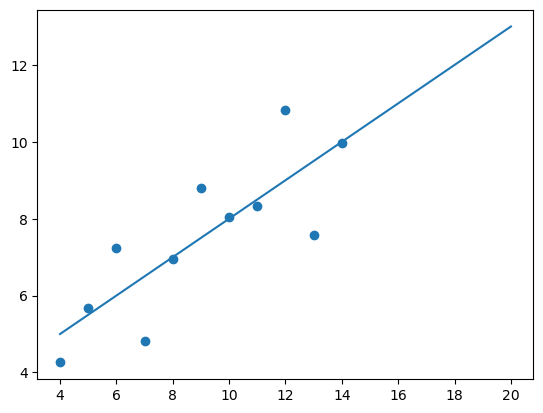

In [28]:
plt.figure()
plt.scatter(df['x1'], df['y1'])
plt.plot(X, y_pred)
plt.show()

In [29]:
# Quadratic model
# Fit the model 
par = np.polyfit(df['x2'], df['y2'], 2) # 1 indicates linear fit in th polyfit 
par # First value is the slope and second value is intercept 

array([-0.12671329,  2.78083916, -5.99573427])

In [30]:
# Generate some X values 
#X = np.array([4, 20]) # new data 
X = np.linspace(4, 20, 120)

In [31]:
# Evaluate the model with some x data 
y_pred = np.polyval(par, X)
y_pred

array([ 3.10020979,  3.33551679,  3.56624238,  3.79238658,  4.01394938,
        4.23093077,  4.44333077,  4.65114937,  4.85438657,  5.05304237,
        5.24711676,  5.43660976,  5.62152136,  5.80185156,  5.97760036,
        6.14876776,  6.31535376,  6.47735836,  6.63478156,  6.78762336,
        6.93588376,  7.07956276,  7.21866036,  7.35317656,  7.48311136,
        7.60846476,  7.72923676,  7.84542736,  7.95703656,  8.06406436,
        8.16651077,  8.26437577,  8.35765937,  8.44636157,  8.53048237,
        8.61002178,  8.68497978,  8.75535638,  8.82115159,  8.88236539,
        8.93899779,  8.9910488 ,  9.0385184 ,  9.08140661,  9.11971341,
        9.15343882,  9.18258282,  9.20714543,  9.22712663,  9.24252644,
        9.25334484,  9.25958185,  9.26123745,  9.25831166,  9.25080446,
        9.23871587,  9.22204588,  9.20079448,  9.17496169,  9.1445475 ,
        9.10955191,  9.06997491,  9.02581652,  8.97707673,  8.92375554,
        8.86585295,  8.80336895,  8.73630356,  8.66465677,  8.58

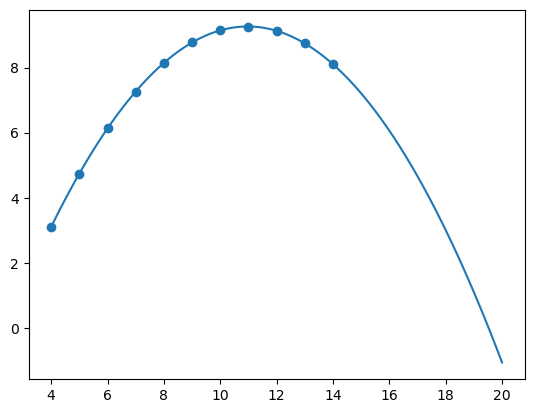

In [32]:
plt.figure()
plt.scatter(df['x2'], df['y2'])
plt.plot(X, y_pred)
plt.show()

## Multiple Linear Regression 

In [33]:
# Import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from statsmodels.formula.api import ols

In [34]:
filename = "https://raw.githubusercontent.com/soilwater/pynotes-agriscience/gh-pages/datasets/corn_allometric_biomass.csv"
df = pd.read_csv(filename)
df.head()

,height_cm,stem_diam_mm,dry_biomass_g
0,71.0,5.7,0.66
1,39.0,4.4,0.19
2,55.5,4.3,0.30
3,41.5,3.7,0.16
4,40.0,3.6,0.14


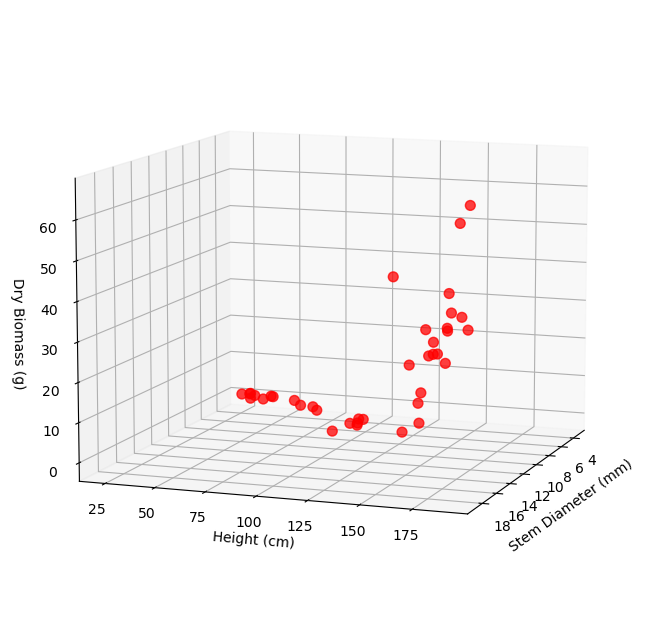

In [35]:
# Explore dataset 
fig = plt.figure(figsize = (8,8))

ax = plt.axes(projection = '3d')
ax.scatter3D(df['stem_diam_mm'],
            df['height_cm'], 
            df['dry_biomass_g'],
            c = "r",
            s= 50, 
            alpha = 0.75)
ax.set_xlabel('Stem Diameter (mm)') #plt.xlabel()
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Dry Biomass (g) ')
ax.view_init(elev = 10, azim = 20)
plt.show()

In [36]:
# Fit full model 
formula_full = 'dry_biomass_g ~ stem_diam_mm * height_cm + np.power(stem_diam_mm, 2) + np.power(height_cm, 2)'

# Define linear model 
lm = ols(formula_full, data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dry_biomass_g   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     43.88
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.11e-13
Time:                        14:29:08   Log-Likelihood:                -126.01
No. Observations:                  38   AIC:                             264.0
Df Residuals:                      32   BIC:                             273.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    22.8289      6.363      3.588      0.001       9.868      35.790
stem_diam_mm                 -8.2331      3.877     -2.123      0.042     -16.131      -0.335
height_cm                     0.0538      0.317      0.170      0.866      -0.592       0.700
stem_diam_mm:height_cm       -0.1713      0.090     -1.898      0.067      -0.355       0.013
np.power(stem_diam_mm, 2)     1.2266      0.503      2.439      0.020       0.202       2.251
np.power(height_cm, 2)        0.0098      0.004      2.196      0.035       0.001       0.019
==============================================================================
Omnibus:                        8.007   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.046
Skew:                           0.785   Prob(JB):                       0.0295
Kurtosis:                       4.408   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Fit the prune or restricted model 
 
formula_prune = 'dry_biomass_g ~ stem_diam_mm + np.power(stem_diam_mm, 2) + np.power(height_cm, 2)'

# Define linear model 
lm_pruned = ols(formula_prune, data = df).fit()
lm_pruned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dry_biomass_g   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     68.68
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.64e-14
Time:                        14:29:09   Log-Likelihood:                -128.04
No. Observations:                  38   AIC:                             264.1
Df Residuals:                      34   BIC:                             270.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    21.4941      6.301      3.411      0.002       8.688      34.300
stem_diam_mm                 -7.1462      1.538     -4.645      0.000     -10.272      -4.020
np.power(stem_diam_mm, 2)     0.3184      0.075      4.220      0.000       0.165       0.472
np.power(height_cm, 2)        0.0015      0.000      4.786      0.000       0.001       0.002
==============================================================================
Omnibus:                        9.192   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.072
Skew:                           0.806   Prob(JB):                       0.0107
Kurtosis:                       4.770   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
lm_pruned.params

Intercept                    21.494065
stem_diam_mm                 -7.146201
np.power(stem_diam_mm, 2)     0.318353
np.power(height_cm, 2)        0.001510
dtype: float64

In [39]:
# Plot the data with the model 
height_vector = np.linspace(df['height_cm'].min(), 
                            df['height_cm'].max(),
                           100)
stem_vector = np.linspace(df['stem_diam_mm'].min(),
                         df['stem_diam_mm'].max(),
                         100)

HEIGHT,STEM = np.meshgrid(height_vector, stem_vector) 


In [40]:
Y = lm_pruned.predict(pd.DataFrame({'stem_diam_mm':STEM.flatten(),
                                    'height_cm':HEIGHT.flatten()}))
Y = np.reshape(Y.values, (HEIGHT.shape))

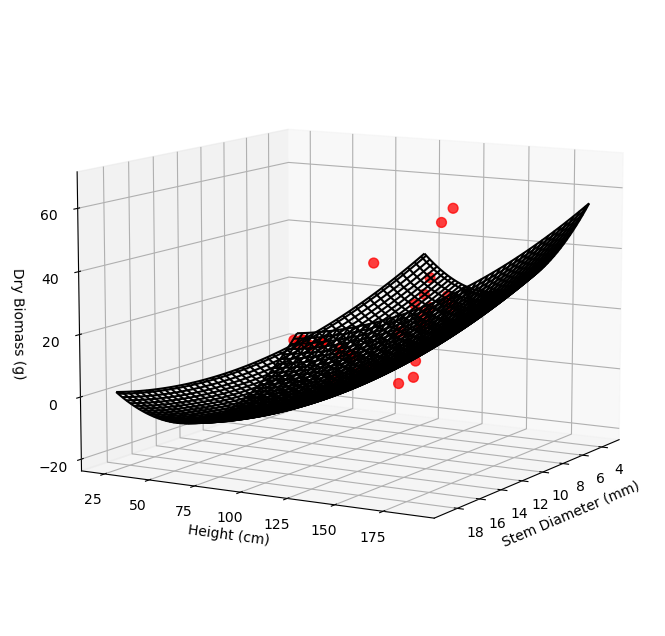

In [41]:
# Explore dataset 
fig = plt.figure(figsize = (8,8))

ax = plt.axes(projection = '3d')
ax.scatter3D(df['stem_diam_mm'],
            df['height_cm'], 
            df['dry_biomass_g'],
            c = "r",
            s= 50, 
            alpha = 0.75)

ax.plot_wireframe(STEM, HEIGHT, Y, color = 'k')
ax.set_xlabel('Stem Diameter (mm)') #plt.xlabel()
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Dry Biomass (g) ')
ax.view_init(elev = 10, azim = 30)
plt.show()

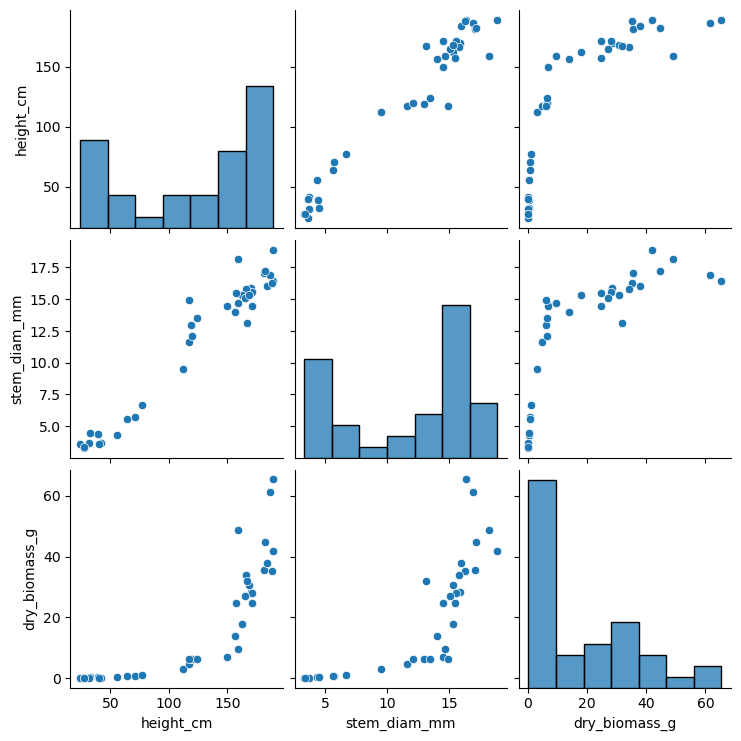

In [42]:
sns.pairplot(df)

## Polynomial Fitting: Fitting the Optimal Nitrogen Rate 

In [43]:
# Import modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [51]:
filename = "https://raw.githubusercontent.com/soilwater/pynotes-agriscience/gh-pages/datasets/corn_nue.csv"
df = pd.read_csv(filename)
df.head()

,Year,State,Site,Replication,Treatment,Total_N,N_Planting_kg_ha,N_sidedress_kg_ha,Yield_T_ha
0,2006,Kansas,Manhattan,1,1,0,0,0,5.40
1,2006,Kansas,Manhattan,1,2,178,178,0,10.05
2,2006,Kansas,Manhattan,1,3,36,36,0,6.55
3,2006,Kansas,Manhattan,1,4,63,36,27,7.70
4,2006,Kansas,Manhattan,1,5,90,36,54,8.29


In [52]:
# Inspect Dataset 
print(df['State'].unique())
print(df['Site'].unique())
print(df['Treatment'].unique())
print(df['Replication'].unique())

['Kansas']
['Manhattan']
[1 2 3 4 5 6 7 8 9]
[1 2 3 4]


In [53]:
# Average grain yield for each treatment 
df = df.groupby(by = "Treatment", as_index = False).mean()
df.head()

,Treatment,Year,Replication,Total_N,N_Planting_kg_ha,N_sidedress_kg_ha,Yield_T_ha
0,1,2006.0,2.5,0.0,0.0,0.0,5.9300
1,2,2006.0,2.5,178.0,178.0,0.0,10.1850
2,3,2006.0,2.5,36.0,36.0,0.0,7.2050
3,4,2006.0,2.5,63.0,36.0,27.0,8.3600
4,5,2006.0,2.5,90.0,36.0,54.0,9.3775


In [54]:
# Inspect for Nans 
df.isna().sum()

Treatment            0
Year                 0
Replication          0
Total_N              0
N_Planting_kg_ha     0
N_sidedress_kg_ha    0
Yield_T_ha           0
dtype: int64

In [56]:
# Create variables with better names 
nitrogen_obs = df['Total_N']
yield_obs = df['Yield_T_ha']

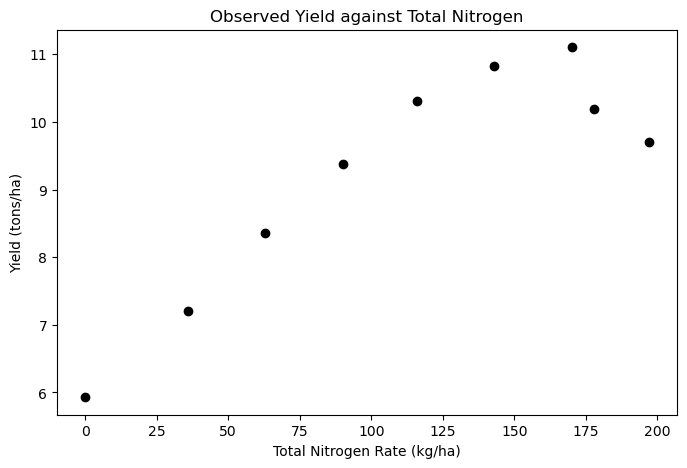

In [66]:
# plot the data 
plt.figure(figsize = (8, 5))
plt.title("Observed Yield against Total Nitrogen")
plt.scatter(nitrogen_obs, yield_obs, facecolor ='k')
plt.xlabel("Total Nitrogen Rate (kg/ha)")
plt.ylabel("Yield (tons/ha)")
plt.show()

In [70]:
# Fit polynomial (quadratic model)
par = np.polyfit(nitrogen_obs, yield_obs, 2)
par

array([-1.97719794e-04,  6.24590803e-02,  5.55320127e+00])

In [108]:
# Evaluate fitted model to predict on new x data (nitorgen rates)
nitrogen_curve = np.arange(nitrogen_obs.max()) # can be used instead of linspace 
X = np.linspace(0, 200, 100)

In [109]:
# Predict with the model 
y_pred = np.polyval(par, X)
response_curve = np.polyval(par, nitrogen_curve)

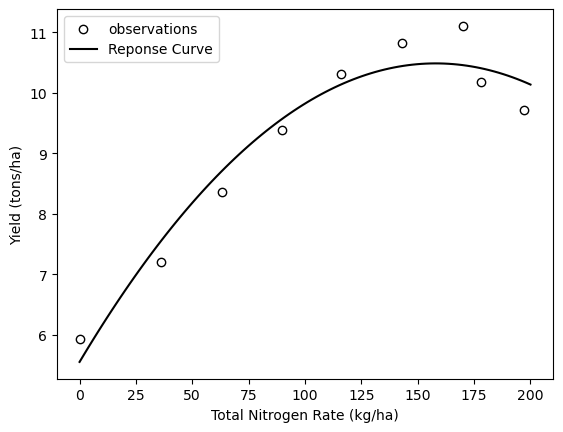

In [102]:
# Create figure 
plt.figure()
plt.scatter(nitrogen_obs, yield_obs, facecolor = "w", edgecolor = 'k', label = "observations")
plt.plot(X, y_pred, c = 'k', label = "Reponse Curve")
plt.xlabel("Total Nitrogen Rate (kg/ha)")
plt.ylabel("Yield (tons/ha)")
plt.legend()
plt.show()
plt.show()

In [107]:
#Find optimal nitrogen rate 
first_derivative = np.diff(y_pred)
idx_lowest_derivative = np.argmin(np.abs(first_derivative))
optimal_nitroge_rate = round(X[idx_lowest_derivative])
print(optimal_nitroge_rate)

158


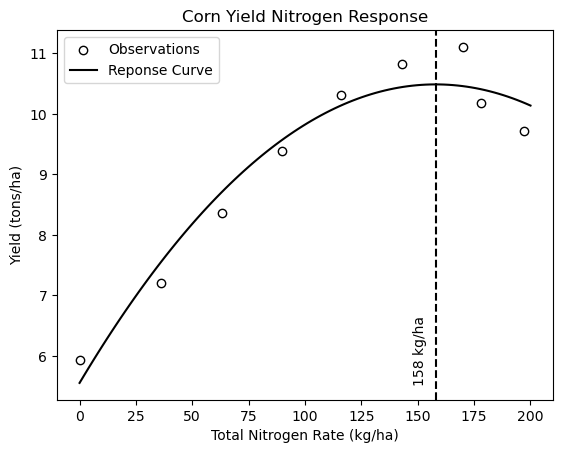

In [116]:
# Find nitrogen rate using the index of the highest yield 
 
plt.figure()
plt.title("Corn Yield Nitrogen Response")
plt.scatter(nitrogen_obs, yield_obs, facecolor = "w", edgecolor = 'k', label = "Observations")
plt.plot(X, y_pred, c = 'k', label = "Reponse Curve")
plt.axvline(optimal_nitroge_rate, linestyle = "--", color = 'k')
plt.xlabel("Total Nitrogen Rate (kg/ha)")
plt.ylabel("Yield (tons/ha)")
plt.text(optimal_nitroge_rate - 10, y_pred.min(), f"{optimal_nitroge_rate} kg/ha", rotation = 90)
plt.legend()
plt.show()
plt.show()